<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB
None
NA qiymatlar:
 Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64
Dublikatlar:
 0
       Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790

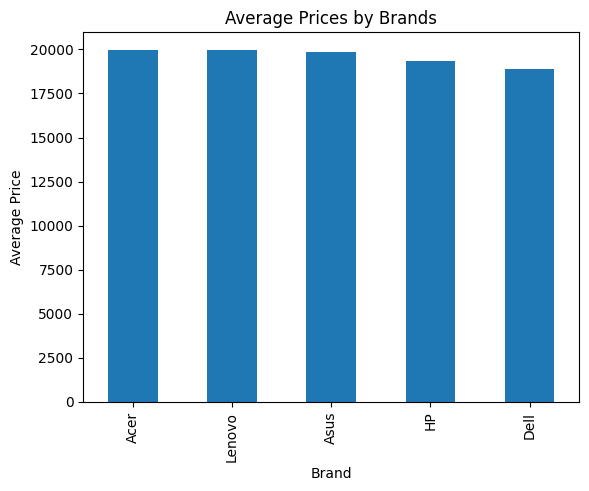

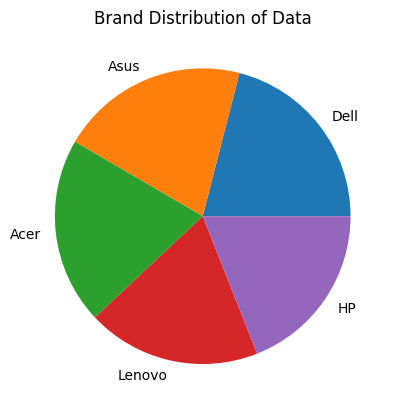

Eng yaxshi parametrlar: {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 12}
Mean Absolute Error: 308.86


c:\Users\ahmad\OneDrive\Рабочий стол\LAPTOP PRICE PREDICTION\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ahmad\OneDrive\Рабочий стол\LAPTOP PRICE PREDICTION\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ahmad\OneDrive\Рабочий стол\LAPTOP PRICE PREDICTION\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~

['rf_model.pkl']

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

# Ma'lumotni yuklash
data = pd.read_csv("Laptop_price.csv")
print(data.info())

# NA qiymatlar va dublikatlarni tekshirish
print("NA qiymatlar:\n", data.isna().sum())
print("Dublikatlar:\n", data.duplicated().sum())

# Agar istasangiz, quyidagilarni faollashtiring:
# data.dropna(inplace=True)
# data.drop_duplicates(inplace=True)

# Statistik tavsif
print(data.describe())

# Vizualizatsiyalar
data.groupby("Brand")["Price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Prices by Brands")
plt.ylabel("Average Price")
plt.show()

data["Brand"].value_counts().sort_values(ascending=False).plot(kind="pie")
plt.title("Brand Distribution of Data")
plt.ylabel("")
plt.show()

# X va y ni aniqlash
y = data["Price"]
X = data[["Processor_Speed", "RAM_Size", "Storage_Capacity"]]

# Train/Test ga bo‘lish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modeli va GridSearch parametrlari
param_gridrfr = {
    "max_depth": [2, 5, 10, 20, 25],
    "max_features": ["auto", "log2"],
    "n_estimators": [2, 4, 6, 8, 10, 12]
}

rfrmodel = RandomForestRegressor(random_state=42)
gridrfr = GridSearchCV(rfrmodel, param_gridrfr, cv=5, n_jobs=-1)
gridrfr.fit(X_train, y_train)

# Eng yaxshi parametrlar
print("Eng yaxshi parametrlar:", gridrfr.best_params_)

# Model bashorati
predictions = gridrfr.predict(X_test)

# Regression metrikasi: MAE
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# Modelni saqlash
joblib.dump(gridrfr, "rf_model.pkl")


In [8]:
from sklearn.metrics import r2_score

# R^2 score ni hisoblash
r2 = r2_score(y_test, predictions)

print(f"Malumot aniqligi (R² score): {r2 * 100:.2f}%")


Malumot aniqligi (R² score): 99.75%


In [4]:
from sklearn.metrics import mean_squared_error
import numpy as np

# MSE hisoblash
mse = mean_squared_error(y_test, predictions)

# Haqiqiy qiymatlarning o'rtacha qiymati
mean_actual = np.mean(y_test)

# MSE ni foizga aylantirish
mse_percentage = (mse / mean_actual**2) * 100

print(f"Mean Squared Error (MSE) foizda: {mse_percentage:.2f}%")


Mean Squared Error (MSE) foizda: 0.06%


In [7]:
import joblib

# Modelni saqlash
joblib.dump(gridrfr, "fr_model.pkl")


['fr_model.pkl']